# Oxford-iiit-pet (tensorflow)

In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dOD.tf_model.model import UNet
from dOD.tf_model.datasets import oxford_iiit
from dOD.tf_model.trainer import Trainer

H, W = oxford_iiit.IMAGE_SIZE

In [2]:
train_ds, test_ds = oxford_iiit.load_data()

In [4]:
modelMaker = UNet(input_shape=(H, W, oxford_iiit.CHANNELS), kernel_shape=(3, 3), nlayer=2,
                               root_feature=64, depth=5, padding='same', activation='relu',
                               drop_rate=0.5, num_classes=oxford_iiit.CLASSES)
modelMaker.build_net()
modelMaker.compile(learning_rate=1e-3,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['sparse_categorical_crossentropy', 'sparse_categorical_accuracy'])
modelMaker.describle()

-------- input shape: (None, 128, 128, 3)
    > layer 0 shape: (None, 128, 128, 64)
    > layer 1 shape: (None, 128, 128, 64)
    downstream layer 1 shape: (None, 128, 128, 64)
        > layer 0 shape: (None, 64, 64, 128)
        > layer 1 shape: (None, 64, 64, 128)
        downstream layer 2 shape: (None, 64, 64, 128)
            > layer 0 shape: (None, 32, 32, 256)
            > layer 1 shape: (None, 32, 32, 256)
            downstream layer 3 shape: (None, 32, 32, 256)
                > layer 0 shape: (None, 16, 16, 512)
                > layer 1 shape: (None, 16, 16, 512)
                downstream layer 4 shape: (None, 16, 16, 512)
                    > layer 0 shape: (None, 8, 8, 1024)
                    > layer 1 shape: (None, 8, 8, 1024)
                    bottom layer 5 shape: (None, 8, 8, 1024)
                > layer 0 shape: (None, 16, 16, 512)
                > layer 1 shape: (None, 16, 16, 512)
                upstream layer 4 shape: (None, 16, 16, 512)
            > la

In [17]:
T = Trainer(logbase='./logs/oxford')
hisotry = T.fit(modelMaker.net, train_ds, validation_dataset=test_ds, epochs=25, batch_size=32)

Epoch 1/25
115/115 [==============================] - 171s 1s/step - loss: 0.3674 - sparse_categorical_crossentropy: 0.3674 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4451 - val_sparse_categorical_crossentropy: 0.4451 - val_sparse_categorical_accuracy: 0.8291
Epoch 2/25
115/115 [==============================] - 171s 1s/step - loss: 0.3613 - sparse_categorical_crossentropy: 0.3613 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.4239 - val_sparse_categorical_crossentropy: 0.4239 - val_sparse_categorical_accuracy: 0.8327
Epoch 3/25
115/115 [==============================] - 171s 1s/step - loss: 0.3496 - sparse_categorical_crossentropy: 0.3496 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.4211 - val_sparse_categorical_crossentropy: 0.4211 - val_sparse_categorical_accuracy: 0.8348
Epoch 4/25
115/115 [==============================] - 170s 1s/step - loss: 0.3540 - sparse_categorical_crossentropy: 0.3540 - sparse_categorical_accuracy: 0.8587 - val_loss: 0.4380 - val_sparse

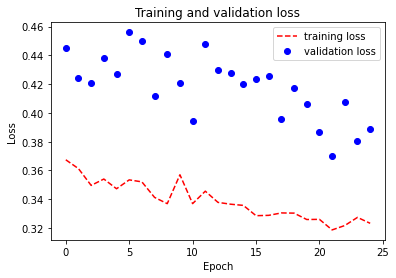

In [21]:
history = hisotry
train_loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 25

plt.figure()
plt.plot(range(EPOCHS), train_loss, 'r--', label='training loss')
plt.plot(range(EPOCHS), val_loss, 'bo', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

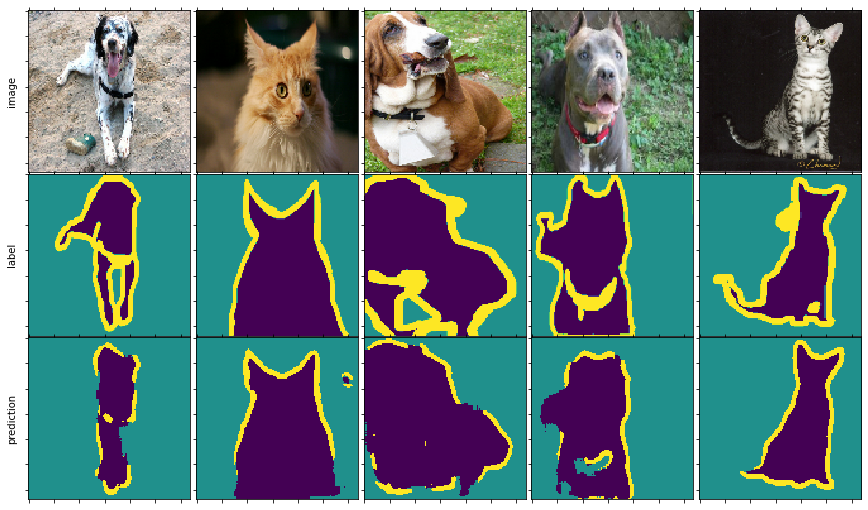

In [19]:
N = 5
fig, axes = plt.subplots(3, N, sharex=True, sharey=True,
                         figsize=(N * 3, 9), gridspec_kw={'wspace': 0.01, 'hspace': 0.01})
for i, (img, label) in enumerate(train_ds.shuffle(buffer_size=1000).take(N).batch(1)):
    prediction = modelMaker.net.predict(img)[0]
    axes[0][i].matshow(img[0])    
    axes[1][i].matshow(label[0, ..., 0], )
    axes[2][i].matshow(prediction.argmax(axis=-1), )
for ax in axes:
    for x in ax:
        x.set_xticklabels([])
        x.set_yticklabels([])
for i, x in enumerate(['image', 'label', 'prediction']):
    axes[i][0].set_ylabel(x);